- age
    - younger vs. older people and decile scores, hypothesize with equivalent means
    - age-specific, using percentage of those who reoffend and see where each age compares to the mean of all people
    
- decile score

- years between offenses

- race
    - compared with decile score and violent decile score in more depth




In [264]:
import numpy as np
import pandas as pd

from IPython.display import Image

import warnings
warnings.simplefilter("ignore")

In [265]:
compas = pd.read_csv("Compas.csv")

In [266]:
compas = compas.drop(compas.columns[0], axis = 1)
compas.head()

,id,first,last,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,v_decile_score,v_score_text,decile_score.1,score_text
0,1,miguel,hernandez,Male,69,Greater than 45,Other,0,1,0,0,0,0,0,1,Low,1,Low
1,2,michael,ryan,Male,31,25 - 45,Caucasian,0,5,0,0,0,-1,0,2,Low,5,Medium
2,3,kevon,dixon,Male,34,25 - 45,African-American,0,3,0,0,0,1,1,1,Low,3,Low
3,4,ed,philo,Male,24,Less than 25,African-American,0,4,0,1,4,1,0,3,Low,4,Low
4,5,marcu,brown,Male,23,Less than 25,African-American,0,8,1,0,1,0,0,6,Medium,8,High


In [267]:
young = compas[compas.age_cat == "Less than 25"].v_decile_score
middle = compas[compas.age_cat == "25 - 45"].v_decile_score
old = compas[compas.age_cat == "Greater than 45"].v_decile_score

In [268]:
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats

These tests are just checking if one age group has a higher risk of violence than the other

In [269]:
print(young.mean(), middle.mean(), old.mean())

6.049180327868853 3.3771995788840425 1.7897301349325336


In [270]:
tstat, pvalue, ddof = ttest_ind(
                                young,
                                middle,
                                alternative="larger",
                                usevar="unequal"
)
print(tstat, pvalue, ddof)

56.21398274904184 0.0 5172.47658225915


In [271]:
 tstat, pvalue, ddof = ttest_ind(
                                middle,
                                old,
                                alternative="larger",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof)    

38.63847158703123 5.2422454240000335e-297 7127.205606761121


In [272]:
tstat, pvalue, ddof = ttest_ind(
                                young,
                                old,
                                alternative="larger",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof) 

87.24747908351314 0.0 4723.302717729157


In [273]:
highrisk = compas[compas.score_text == "High"]
highrisk = highrisk[(highrisk.is_recid != -1) & (highrisk.decile_score != -1)]
## -1 = unknown, so those were deleted

In [274]:
highrisk["accuracy"] = (highrisk.is_recid == 1)
##checked if is_recid is True with high risk decile score to determine accuracy

In [275]:
young2 = highrisk[highrisk.age_cat == "Less than 25"].accuracy
middle2 = highrisk[highrisk.age_cat == "25 - 45"].accuracy
old2 = highrisk[highrisk.age_cat == "Greater than 45"].accuracy
##subset by age

In [276]:
print(young2.mean(), middle2.mean(), old2.mean())

0.5481927710843374 0.5325732899022801 0.4251207729468599


In [277]:
 tstat, pvalue, ddof = ttest_ind(
                                young2,
                                middle2,
                                alternative="two-sided",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof) 

0.6505547751165384 0.5154436817845576 1361.6788657477787


In [278]:
 tstat, pvalue, ddof = ttest_ind(
                                young2,
                                old2,
                                alternative="two-sided",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof) 

3.116051265304813 0.001986434026815587 345.5133605030412


In [279]:
 tstat, pvalue, ddof = ttest_ind(
                                middle2,
                                old2,
                                alternative="two-sided",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof) 

2.882869983424161 0.004244991793179706 281.10125290631083


These hypothesis tests were checking if there was a significant difference between the age groups accuracy. 
It seems as though there is a signifcant difference between the younger two groups and the oldest group.
It would also be a good idea to look at low risk. 

In [280]:
##same procedure but with low risk
lowrisk = compas[compas.score_text == "Low"]
lowrisk = lowrisk[(lowrisk.is_recid != -1) & (lowrisk.decile_score != -1)]

In [281]:
lowrisk["accuracy"] = (lowrisk.is_recid == 0)
##accurate if is_recid == 0

In [282]:
young3 = lowrisk[lowrisk.age_cat == "Less than 25"].accuracy
middle3 = lowrisk[lowrisk.age_cat == "25 - 45"].accuracy
old3 = lowrisk[lowrisk.age_cat == "Greater than 45"].accuracy

In [283]:
print(young3.mean(), middle3.mean(), old3.mean())

0.690734055354994 0.7607060185185185 0.8178879310344828


In [284]:
 tstat, pvalue, ddof = ttest_ind(
                                young3,
                                middle3,
                                alternative="two-sided",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof) 

-3.9737509848699326 7.499325893430174e-05 1192.5917089874865


In [285]:
 tstat, pvalue, ddof = ttest_ind(
                                young3,
                                old3,
                                alternative="two-sided",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof) 

-6.919646610619877 6.9337001458953706e-12 1369.0461762834632


In [286]:
 tstat, pvalue, ddof = ttest_ind(
                                middle3,
                                old3,
                                alternative="two-sided",
                                usevar="unequal"
 )
print(tstat, pvalue, ddof) 

-4.958642361248988 7.383646858476191e-07 4132.705113743328


The low risk accuracy for the oldest group is much higher.
The differences in accuracy are significant between all groups. They likely do not have the same average accuracy. 
Since the average accuracy for the oldest group is significantly lower for high risk and higher for low risk, this may mean this algorithm may give the older group lower scores in general. 

# Comparing the accuracy of "High" predictive values across race and sex

In [287]:
compasrisk = compas[(compas.race == "African-American") | (compas.race == "Caucasian")]
compasrisk = compasrisk[(compasrisk.is_recid != -1) & (compasrisk.decile_score != -1)]
highriskrace = compasrisk[(compasrisk.score_text == "High")]
lowriskrace  = compasrisk[(compasrisk.score_text == "Low")]
highriskrace["accuracyhigh"] = (compasrisk.is_recid == 1)
lowriskrace["accuracylow"] = (compasrisk.is_recid == 0)

In [288]:
HWhitt = highriskrace[(highriskrace.race=="Caucasian")&(highriskrace.score_text=="High")].accuracyhigh
HWhitemen = highriskrace[(highriskrace.race=="Caucasian")&(highriskrace.sex=="Male")&(highriskrace.score_text=="High")].accuracyhigh
HWhitewomen = highriskrace[(highriskrace.race=="Caucasian")&(highriskrace.sex=="Female")&(highriskrace.score_text=="High")].accuracyhigh
HBlakk = highriskrace[(highriskrace.race=="African-American")&(highriskrace.score_text=="High")].accuracyhigh
HBlackmen = highriskrace[(highriskrace.race=="African-American")&(highriskrace.sex=="Male")&(highriskrace.score_text=="High")].accuracyhigh
HBlackwomen = highriskrace[(highriskrace.race=="African-American")&(highriskrace.sex=="Female")&(highriskrace.score_text=="High")].accuracyhigh

LWhitt = lowriskrace[(lowriskrace.race=="Caucasian")&(lowriskrace.score_text=="Low")].accuracylow
LWhitemen = lowriskrace[(lowriskrace.race=="Caucasian")&(lowriskrace.sex=="Male")&(lowriskrace.score_text=="Low")].accuracylow
LWhitewomen = lowriskrace[(lowriskrace.race=="Caucasian")&(lowriskrace.sex=="Female")&(lowriskrace.score_text=="Low")].accuracylow
LBlakk = lowriskrace[(lowriskrace.race=="African-American")&(lowriskrace.score_text=="Low")].accuracylow
LBlackmen = lowriskrace[(lowriskrace.race=="African-American")&(lowriskrace.sex=="Male")&(lowriskrace.score_text=="Low")].accuracylow
LBlackwomen = lowriskrace[(lowriskrace.race=="African-American")&(lowriskrace.sex=="Female")&(lowriskrace.score_text=="Low")].accuracylow

In [289]:
tstat, pvalue, ddof = ttest_ind(HWhitt,HBlakk,alternative="smaller",usevar="unequal")
tstat1, pvalue1, ddof1 = ttest_ind(HWhitemen,HBlackmen,alternative="smaller",usevar="unequal")
tstat2, pvalue2, ddof2 = ttest_ind(HWhitewomen,HBlackwomen,alternative="smaller",usevar="unequal")
tstat3, pvalue3, ddof3 = ttest_ind(HBlackwomen,HWhitemen,alternative="smaller",usevar="unequal")
tstat4, pvalue4, ddof4 = ttest_ind(HWhitewomen,HBlackmen,alternative="smaller",usevar="unequal")
tstat5, pvalue5, ddof5 = ttest_ind(HWhitewomen,HWhitemen,alternative="smaller",usevar="unequal")
tstat6, pvalue6, ddof6 = ttest_ind(HBlackwomen,HBlackmen,alternative="smaller",usevar="unequal")

Ltstat, Lpvalue, Lddof = ttest_ind(LWhitt,LBlakk,alternative="larger",usevar="unequal")
Ltstat1, Lpvalue1, Lddof1 = ttest_ind(LWhitemen,LBlackmen,alternative="larger",usevar="unequal")
Ltstat2, Lpvalue2, Lddof2 = ttest_ind(LWhitewomen,LBlackwomen,alternative="larger",usevar="unequal")
Ltstat3, Lpvalue3, Lddof3 = ttest_ind(LBlackwomen,LWhitemen,alternative="larger",usevar="unequal")
Ltstat4, Lpvalue4, Lddof4 = ttest_ind(LWhitewomen,LBlackmen,alternative="larger",usevar="unequal")
Ltstat5, Lpvalue5, Lddof4 = ttest_ind(LWhitewomen,LWhitemen,alternative="larger",usevar="unequal")
Ltstat6, Lpvalue6, Lddof5 = ttest_ind(LBlackwomen,LBlackmen,alternative="larger",usevar="unequal")

In [290]:
print("High risk accuracy p-value", "\n","\n"
      "White and Black p-value:", round(pvalue, 4), "\n" 
      "White men and Black men p-value:", round(pvalue1, 4),"\n"
      "White women and Black women p-value:", round(pvalue2, 4),"\n"
      "Black women and White men p-value:", round(pvalue3, 4), "\n"
      "White women and Black men p-value:",round(pvalue4, 4), "\n"
      "White women and White men p-value:", round(pvalue5, 4), "\n"
      "Black women and Black men p-value:", round(pvalue6, 4), "\n" "\n"
      "Low risk accuracy p-value", "\n","\n"
      "White and Black p-value:", round(Lpvalue, 4), "\n" 
      "White men and Black men p-value:", round(Lpvalue1, 4),"\n"
      "White women and Black women p-value:", round(Lpvalue2, 4),"\n"
      "Black women and White men p-value:", round(Lpvalue3, 4), "\n"
      "White women and Black men p-value:", round(Lpvalue4, 4), "\n"
      "White women and White men p-value:", round(Lpvalue5, 4), "\n"
      "Black women and Black men p-value:", round(Lpvalue6, 4), "\n")

High risk accuracy p-value 
 
White and Black p-value: 0.0557 
White men and Black men p-value: 0.251 
White women and Black women p-value: 0.1496 
Black women and White men p-value: 0.033 
White women and Black men p-value: 0.0005 
White women and White men p-value: 0.0048 
Black women and Black men p-value: 0.0032 

Low risk accuracy p-value 
 
White and Black p-value: 0.0 
White men and Black men p-value: 0.0 
White women and Black women p-value: 0.5392 
Black women and White men p-value: 0.0031 
White women and Black men p-value: 0.0 
White women and White men p-value: 0.0035 
Black women and Black men p-value: 0.0 



# Findings

### There is a statistically significant discrepancy in the accuracies of "High" predictive values for recidivism when comparing:
- Black women and White men
- White women and Black men 
- White women and White men  
- Black women and Black men 

### There is a statistically significant discrepancy in the accuracies of "Low" predictive values for recidivism when comparing:
- White and Black overall population
- White men and Black men 
- White men and Black women 
- White women and Black men
- White women and White men
- Black women and Black men

# Data being compared:

In [291]:
highvisual = highriskrace.groupby(["race", "sex", "score_text"])[["accuracyhigh"]].mean()
highvisual

accuracyhigh
race             sex    score_text              
African-American Female High            0.446701
                 Male   High            0.551416
Caucasian        Female High            0.384615
                 Male   High            0.530351

In [292]:
lowvisual = lowriskrace.groupby(["race", "sex", "score_text"])[["accuracylow"]].mean()
lowvisual

accuracylow
race             sex    score_text             
African-American Female Low            0.829175
                 Male   Low            0.698218
Caucasian        Female Low            0.826923
                 Male   Low            0.777157

# Comparing the accuracy of "Low" predictive values across race and sex

In [293]:
import numpy as np
import pandas as pd

from IPython.display import Image

import warnings

from statsmodels.stats.weightstats import ttest_ind
from scipy import stats
vcompasrisk = compas[(compas.race == "African-American") | (compas.race == "Caucasian")]
vcompasrisk = vcompasrisk[(vcompasrisk.is_violent_recid != -1) & (vcompasrisk.v_decile_score != -1)]
vhighriskrace = vcompasrisk[(vcompasrisk.v_score_text == "High")]
vlowriskrace  = vcompasrisk[(vcompasrisk.v_score_text == "Low")]
vhighriskrace["vaccuracyhigh"] = (vcompasrisk.is_violent_recid == 1)
vlowriskrace["vaccuracylow"] = (vcompasrisk.is_violent_recid == 0)

VHWhitt = vhighriskrace[(vhighriskrace.race=="Caucasian")&(vhighriskrace.v_score_text=="High")].vaccuracyhigh
VHWhitemen = vhighriskrace[(vhighriskrace.race=="Caucasian")&(vhighriskrace.sex=="Male")&(vhighriskrace.v_score_text=="High")].vaccuracyhigh
VHWhitewomen = vhighriskrace[(vhighriskrace.race=="Caucasian")&(vhighriskrace.sex=="Female")&(vhighriskrace.v_score_text=="High")].vaccuracyhigh
VHBlakk = vhighriskrace[(vhighriskrace.race=="African-American")&(vhighriskrace.v_score_text=="High")].vaccuracyhigh
VHBlackmen = vhighriskrace[(vhighriskrace.race=="African-American")&(vhighriskrace.sex=="Male")&(vhighriskrace.v_score_text=="High")].vaccuracyhigh
VHBlackwomen = vhighriskrace[(vhighriskrace.race=="African-American")&(vhighriskrace.sex=="Female")&(vhighriskrace.v_score_text=="High")].vaccuracyhigh

VLWhitt = vlowriskrace[(vlowriskrace.race=="Caucasian")&(vlowriskrace.v_score_text=="Low")].vaccuracylow
VLWhitemen = vlowriskrace[(vlowriskrace.race=="Caucasian")&(vlowriskrace.sex=="Male")&(vlowriskrace.v_score_text=="Low")].vaccuracylow
VLWhitewomen = vlowriskrace[(vlowriskrace.race=="Caucasian")&(vlowriskrace.sex=="Female")&(vlowriskrace.v_score_text=="Low")].vaccuracylow
VLBlakk = vlowriskrace[(vlowriskrace.race=="African-American")&(vlowriskrace.v_score_text=="Low")].vaccuracylow
VLBlackmen = vlowriskrace[(vlowriskrace.race=="African-American")&(vlowriskrace.sex=="Male")&(vlowriskrace.v_score_text=="Low")].vaccuracylow
VLBlackwomen = vlowriskrace[(vlowriskrace.race=="African-American")&(vlowriskrace.sex=="Female")&(vlowriskrace.v_score_text=="Low")].vaccuracylow
Vtstat, Vpvalue, Vddof = ttest_ind(VHWhitt,VHBlakk,alternative="smaller",usevar="unequal")
Vtstat1, Vpvalue1, Vddof1 = ttest_ind(VHWhitemen,VHBlackmen,alternative="smaller",usevar="unequal")
Vtstat2, Vpvalue2, Vddof2 = ttest_ind(VHBlackwomen,VHWhitewomen,alternative="smaller",usevar="unequal")
Vtstat3, Vpvalue3, Vddof3 = ttest_ind(VHBlackwomen,VHWhitemen,alternative="smaller",usevar="unequal")
Vtstat4, Vpvalue4, Vddof4 = ttest_ind(VHWhitewomen,VHBlackmen,alternative="smaller",usevar="unequal")
Vtstat5, Vpvalue5, Vddof5 = ttest_ind(VHWhitemen,VHWhitewomen,alternative="smaller",usevar="unequal")
Vtstat6, Vpvalue6, Vddof6 = ttest_ind(VHBlackwomen,VHBlackmen,alternative="smaller",usevar="unequal")

VLtstat, VLpvalue, VLddof = ttest_ind(VLWhitt,VLBlakk,alternative="larger",usevar="unequal")
VLtstat1, VLpvalue1, VLddof1 = ttest_ind(VLWhitemen,VLBlackmen,alternative="larger",usevar="unequal")
VLtstat2, VLpvalue2, VLddof2 = ttest_ind(VLWhitewomen,VLBlackwomen,alternative="larger",usevar="unequal")
VLtstat3, VLpvalue3, VLddof3 = ttest_ind(VLWhitemen,VLBlackwomen,alternative="larger",usevar="unequal")
VLtstat4, VLpvalue4, VLddof4 = ttest_ind(VLWhitewomen,VLBlackmen,alternative="larger",usevar="unequal")
VLtstat5, VLpvalue5, VLddof4 = ttest_ind(VLWhitewomen,VLWhitemen,alternative="larger",usevar="unequal")
VLtstat6, VLpvalue6, VLddof5 = ttest_ind(VLBlackwomen,VLBlackmen,alternative="larger",usevar="unequal")
print("High risk accuracy p-value", "\n","\n"
      "White and Black p-value:", round(Vpvalue, 4), "\n" 
      "White men and Black men p-value:", round(Vpvalue1, 4),"\n"
      "Black women and White women p-value:", round(Vpvalue2, 4),"\n"
      "Black women and White men p-value:", round(Vpvalue3, 4), "\n"
      "White women and Black men p-value:",round(Vpvalue4, 4), "\n"
      "White men and White women p-value:", round(Vpvalue5, 4), "\n"
      "Black women and Black men p-value:", round(Vpvalue6, 4), "\n" "\n"

      "Low risk accuracy p-value", "\n","\n"
      "White and Black p-value:", round(VLpvalue, 4), "\n" 
      "White men and Black men p-value:", round(VLpvalue1, 4),"\n"
      "White women and Black women p-value:", round(VLpvalue2, 4),"\n"
      "White men and Black women p-value:", round(VLpvalue3, 4), "\n"
      "White women and Black men p-value:", round(VLpvalue4, 4), "\n"
      "White women and White men p-value:", round(VLpvalue5, 4), "\n"
      "Black women and Black men p-value:", round(VLpvalue6, 4), "\n")


High risk accuracy p-value 
 
White and Black p-value: 0.0857 
White men and Black men p-value: 0.0652 
Black women and White women p-value: 0.3683 
Black women and White men p-value: 0.3224 
White women and Black men p-value: 0.3133 
White men and White women p-value: 0.4626 
Black women and Black men p-value: 0.0468 

Low risk accuracy p-value 
 
White and Black p-value: 0.0025 
White men and Black men p-value: 0.0332 
White women and Black women p-value: 0.0052 
White men and Black women p-value: 0.4338 
White women and Black men p-value: 0.0 
White women and White men p-value: 0.0006 
Black women and Black men p-value: 0.1287 



# Findings

### There is a statistically significant discrepancy in the accuracies of "High" predictive values for recidivism when comparing: 
- Black women and Black men 

### There is a statistically significant discrepancy in the accuracies of "Low" predictive values for recidivism when comparing:
- White and Black overall population
- White men and Black men
- White women and Black women
- White women and Black men
- White women and White men

# Data being compared:

In [294]:
Violenthighvisual = vhighriskrace.groupby(["race", "sex", "v_score_text"])[["vaccuracyhigh"]].mean()
Violenthighvisual

vaccuracyhigh
race             sex    v_score_text               
African-American Female High               0.108108
                 Male   High               0.173913
Caucasian        Female High               0.136364
                 Male   High               0.128834

In [295]:
Violentlowvisual = vlowriskrace.groupby(["race", "sex", "v_score_text"])[["vaccuracylow"]].mean()
Violentlowvisual

vaccuracylow
race             sex    v_score_text              
African-American Female Low               0.946015
                 Male   Low               0.935263
Caucasian        Female Low               0.971640
                 Male   Low               0.947564

# Linear Regression Decile Score Entire DataSet

In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize':(6,6)}) 
%matplotlib inline

In [297]:
LinComp = compas.select_dtypes(np.number).fillna(0)
cor = LinComp.corr()
cor_target = abs(cor["decile_score"])
relevant_features = cor_target[cor_target > .5]
relevant_features

decile_score      1.000000
v_decile_score    0.773795
decile_score.1    1.000000
Name: decile_score, dtype: float64

In [298]:
#took out 'Unnamed: 0', it gave me errors when it was including in the set of DROP
DROP = ["priors_count", 'id','decile_score.1', "juv_fel_count", "juv_misd_count", "juv_other_count",  "is_recid", "is_violent_recid"]
LinComp = LinComp.drop(DROP, axis =1)

In [299]:
targetvariable = "decile_score"
independentvariables = LinComp.drop(columns=targetvariable).columns

In [300]:
X_train, X_test, y_train, y_test = train_test_split(
     LinComp[independentvariables],
     LinComp[targetvariable], 
     test_size=0.2,
    random_state = 13,)

In [301]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [302]:
independentvariables = LinComp.columns
targetvariables = "targetvariables"

In [303]:
predictions = model.predict(X_test)

In [304]:
X = X_test.reset_index().copy() 
X["decile_score"] = y_test.tolist()
X["prediction"] = predictions

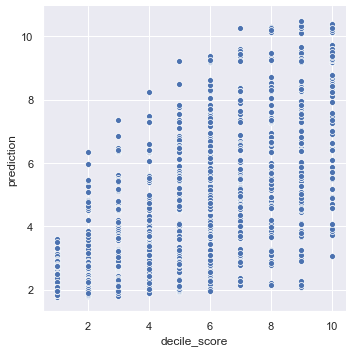

In [305]:
sns.relplot(x="decile_score", y="prediction", data=X, kind="scatter")

Text(0, 0.5, 'decile_score')

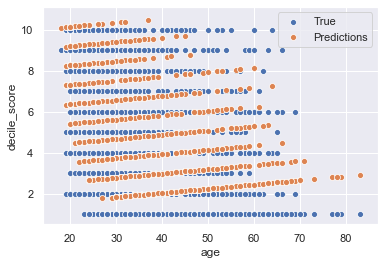

In [306]:
sns.scatterplot(x=X["age"], y=X["decile_score"], label = 'True')
sns.scatterplot(x=X["age"], y=X["prediction"], label = 'Predictions')
sns.mpl.pyplot.ylabel("decile_score")

In [307]:
X["error"] = abs(X["decile_score"]-X["prediction"])

In [308]:
X.head()

,index,age,v_decile_score,decile_score,prediction,error
0,1070,37,1,1,1.970641,0.970641
1,11648,23,5,4,5.472164,1.472164
2,543,30,2,1,2.774430,1.774430
3,7788,34,1,2,1.909277,0.090723
4,4025,40,1,2,2.032005,0.032005


In [309]:
X.error.describe()

count    2352.000000
mean        1.441524
std         1.095448
min         0.008904
25%         0.680493
50%         1.237120
75%         1.794885
max         6.939204
Name: error, dtype: float64

# Linear Regression Violent Decile Score Entire DataSet

In [310]:
VLinComp = compas.select_dtypes(np.number).fillna(0)

In [311]:
Vcor = VLinComp.corr()
Vcor_target = abs(Vcor["v_decile_score"])
Vrelevant_features = Vcor_target[Vcor_target > .5]

In [312]:
#took out Unnamed:0 again
DROP = ["priors_count", 'id','decile_score.1', "juv_fel_count", "juv_misd_count", "juv_other_count",  "is_recid", "is_violent_recid"]
VLinComp = VLinComp.drop(DROP, axis =1)

In [313]:
Vtargetvariable = "v_decile_score"
Vindependentvariables = VLinComp.drop(columns=Vtargetvariable).columns

In [314]:
VX_train, VX_test, Vy_train, Vy_test = train_test_split(
     VLinComp[Vindependentvariables],
     VLinComp[Vtargetvariable], 
     test_size=0.2,
    random_state = 13,)

In [315]:
Vmodel = LinearRegression()
Vmodel.fit(VX_train, Vy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [316]:
Vindependentvariables = VLinComp.columns
Vtargetvariables = "Vtargetvariables"

In [317]:
Vpredictions = Vmodel.predict(VX_test)

In [318]:
V = VX_test.reset_index().copy() 
V["V_decile_score"] = Vy_test.tolist()
V["prediction"] = Vpredictions

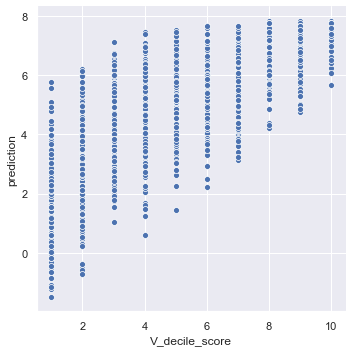

In [319]:
sns.relplot(x="V_decile_score", y="prediction", data=V, kind="scatter")

Text(0, 0.5, 'Vdecile_score')

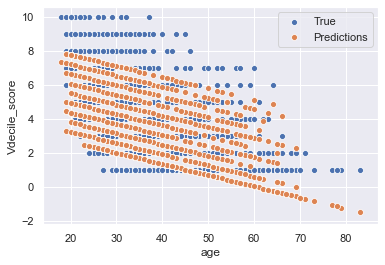

In [320]:
sns.scatterplot(x=V["age"], y=V["V_decile_score"], label = 'True')
sns.scatterplot(x=V["age"], y=V["prediction"], label = 'Predictions')
sns.mpl.pyplot.ylabel("Vdecile_score")

In [321]:
V["error"] = abs(V["V_decile_score"]-V["prediction"])

In [322]:
V.head()

,index,age,decile_score,V_decile_score,prediction,error
0,1070,37,1,1,1.539418,0.539418
1,11648,23,4,5,4.168556,0.831444
2,543,30,1,2,2.001623,0.001623
3,7788,34,2,1,2.305749,1.305749
4,4025,40,2,1,1.909573,0.909573


In [323]:
V.error.describe()

count    2352.000000
mean        1.080619
std         0.884090
min         0.001623
25%         0.384991
50%         0.838410
75%         1.569866
max         4.755214
Name: error, dtype: float64

# Lin Regression African Americans

In [324]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize':(6,6)}) 
%matplotlib inline

In [325]:
compas = pd.read_csv("Compas.csv")

CompasAfricanAmericans = compas[(compas.race == "African-American")]
LinCompAfr = CompasAfricanAmericans.select_dtypes(np.number).fillna(0)
corAfr = LinCompAfr.corr()
cor_targetAfr = abs(corAfr["decile_score"])
relevant_featuresAfr = cor_targetAfr[cor_targetAfr > .4]
relevant_featuresAfr

decile_score      1.000000
v_decile_score    0.740446
decile_score.1    1.000000
Name: decile_score, dtype: float64

In [326]:
DROP = ['Unnamed: 0', "priors_count", 'id','decile_score.1', "juv_fel_count", "juv_misd_count", "juv_other_count",  "is_recid", "is_violent_recid"]
LinCompAfr = LinCompAfr.drop(DROP, axis =1)

In [327]:
targetvariablesAfr = "decile_score"
independentvariablesAfr = LinCompAfr.drop(columns=targetvariablesAfr).columns

In [328]:
X_trainAfr, X_testAfr, y_trainAfr, y_testAfr = train_test_split(
     LinCompAfr[independentvariablesAfr],   # X
     LinCompAfr[targetvariablesAfr], # y
     test_size=0.2,
    random_state = 12)

In [329]:
modelAfr = LinearRegression()
modelAfr.fit(X_trainAfr, y_trainAfr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [330]:
predictionsAfr = modelAfr.predict(X_testAfr)

In [331]:
Afr = X_testAfr.reset_index().copy() 
Afr["decile_score"] = y_testAfr.tolist()
Afr["prediction"] = predictionsAfr

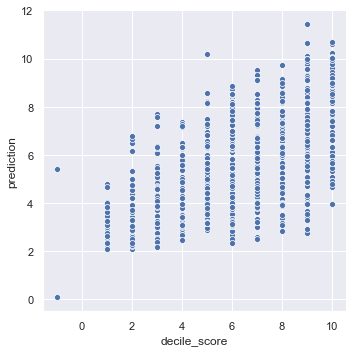

In [332]:
sns.relplot(x="decile_score", y="prediction", data=Afr, kind="scatter")

Text(0, 0.5, 'decile_score')

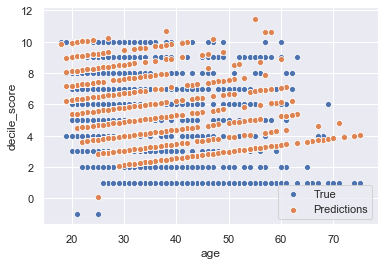

In [333]:
sns.scatterplot(x=Afr["age"], y=Afr["decile_score"], label = 'True')
sns.scatterplot(x=Afr["age"], y=Afr["prediction"], label = 'Predictions')
sns.mpl.pyplot.ylabel("decile_score")

In [334]:
Afr["error"] = abs(Afr["decile_score"]-Afr["prediction"])

In [335]:
Afr.head()

,index,age,v_decile_score,decile_score,prediction,error
0,5304,42,3,4,4.468156,0.468156
1,925,28,7,7,7.529444,0.529444
2,10800,20,8,5,8.102811,3.102811
3,759,29,6,7,6.657480,0.342520
4,5193,55,1,1,3.193452,2.193452


In [336]:
Afr.error.describe()

count    1163.000000
mean        1.580950
std         1.143392
min         0.001001
25%         0.683939
50%         1.385044
75%         2.201403
max         6.401607
Name: error, dtype: float64

# Lin Regression Decile Score White

In [337]:
CompasWhite = compas[(compas.race == "Caucasian")]
LinCompWh = CompasWhite.select_dtypes(np.number).fillna(0)
corWh = LinCompWh.corr()
cor_targetWh = abs(corWh["decile_score"])
relevant_featuresWh = cor_targetWh[cor_targetWh > .4]
relevant_featuresWh

age               0.43710
decile_score      1.00000
v_decile_score    0.74415
decile_score.1    1.00000
Name: decile_score, dtype: float64

In [338]:
DROP = ['Unnamed: 0', "priors_count", 'id','decile_score.1', "juv_fel_count", "juv_misd_count", "juv_other_count",  "is_recid", "is_violent_recid"]
LinCompWh = LinCompWh.drop(DROP, axis =1)

In [339]:
targetvariablesWh = "decile_score"
independentvariablesWh = LinCompWh.drop(columns=targetvariablesWh).columns

In [340]:
X_trainWh, X_testWh, y_trainWh, y_testWh = train_test_split(
     LinCompWh[independentvariablesWh],
     LinCompWh[targetvariablesWh],
     test_size=0.2,
    random_state = 12)

In [341]:
modelWh = LinearRegression()
modelWh.fit(X_trainWh, y_trainWh)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [342]:
predictionsWh = modelWh.predict(X_testWh)

In [343]:
Wh = X_testWh.reset_index().copy() 
Wh["decile_score"] = y_testWh.tolist()
Wh["prediction"] = predictionsWh

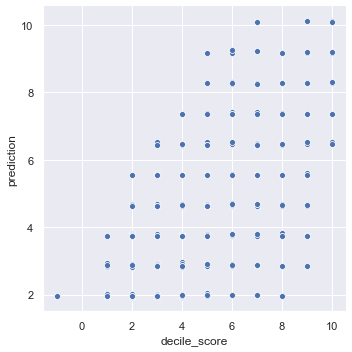

In [344]:
sns.relplot(x="decile_score", y="prediction", data=Wh, kind="scatter")

Text(0, 0.5, 'decile_score')

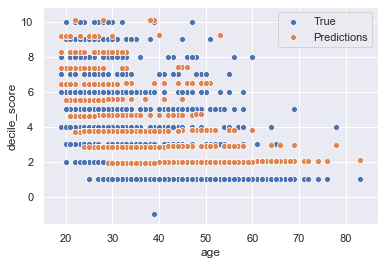

In [345]:
sns.scatterplot(x=Wh["age"], y=Wh["decile_score"], label = 'True')
sns.scatterplot(x=Wh["age"], y=Wh["prediction"], label = 'Predictions')
sns.mpl.pyplot.ylabel("decile_score")

In [346]:
Wh["error"] = abs(Wh["decile_score"]-Wh["prediction"])

In [347]:
Wh.head()

,index,age,v_decile_score,decile_score,prediction,error
0,10844,50,1,1,1.984860,0.984860
1,11326,51,3,2,3.803674,1.803674
2,279,38,2,5,2.860664,2.139336
3,1864,36,1,1,1.947225,0.947225
4,7034,25,6,5,6.457968,1.457968


In [348]:
Wh.error.describe()

count    817.000000
mean       1.366638
std        1.044426
min        0.000989
25%        0.831094
50%        1.006366
75%        1.836471
max        6.158153
Name: error, dtype: float64

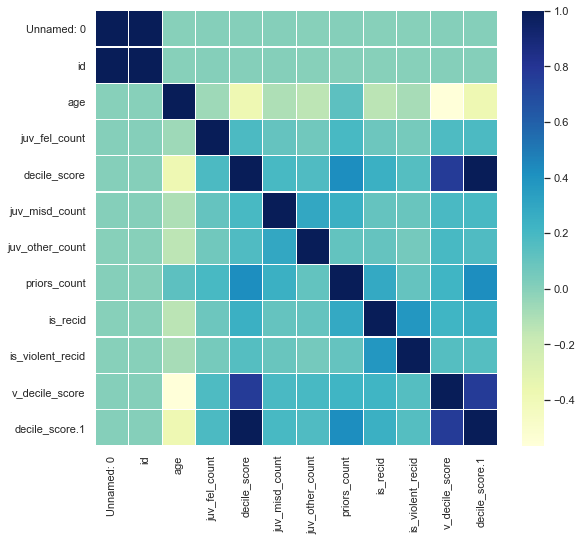

In [349]:
import seaborn as sns
corrmat = compas.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


In [350]:
corrmat

,Unnamed: 0,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,v_decile_score,decile_score.1
Unnamed: 0,1.000000,1.000000,0.001331,0.005323,0.007277,0.006339,0.002258,0.005788,0.002813,0.001125,0.005061,0.007277
id,1.000000,1.000000,0.001331,0.005323,0.007277,0.006339,0.002258,0.005788,0.002813,0.001125,0.005061,0.007277
age,0.001331,0.001331,1.000000,-0.061385,-0.376641,-0.104723,-0.147641,0.129566,-0.138273,-0.083107,-0.565021,-0.376641
juv_fel_count,0.005323,0.005323,-0.061385,1.000000,0.180830,0.102755,0.065665,0.197984,0.080481,0.050528,0.175257,0.180830
decile_score,0.007277,0.007277,-0.376641,0.180830,1.000000,0.198759,0.170072,0.424028,0.251125,0.150537,0.773795,1.000000
juv_misd_count,0.006339,0.006339,-0.104723,0.102755,0.198759,1.000000,0.294255,0.248409,0.106061,0.089695,0.187362,0.198759
juv_other_count,0.002258,0.002258,-0.147641,0.065665,0.170072,0.294255,1.000000,0.112558,0.102907,0.053004,0.193398,0.170072
priors_count,0.005788,0.005788,0.129566,0.197984,0.424028,0.248409,0.112558,1.000000,0.289822,0.102265,0.221316,0.424028
is_recid,0.002813,0.002813,-0.138273,0.080481,0.251125,0.106061,0.102907,0.289822,1.000000,0.380631,0.220425,0.251125
is_violent_recid,0.001125,0.001125,-0.083107,0.050528,0.150537,0.089695,0.053004,0.102265,0.380631,1.000000,0.155343,0.150537


In [351]:
compas2 = pd.read_csv("compas-scores-two-years.csv")
compas2.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [352]:
colremove = ['id', 'name', 'first', 'last', 'compas_screening_date','dob','age_cat',
             'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas','r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out','vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment','screening_date',
       'v_type_of_assessment','v_screening_date', 'in_custody', 'out_custody','start', 'end', 'event',
       'c_charge_degree', 'c_charge_desc', "priors_count.1", "violent_recid"]
compasml = compas2.drop(colremove, axis =1)

In [353]:
compasml.head()

,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,decile_score.1,score_text,v_decile_score,v_score_text,two_year_recid
0,Male,69,Other,0,1,0,0,0,0,0,1,Low,1,Low,0
1,Male,34,African-American,0,3,0,0,0,1,1,3,Low,1,Low,1
2,Male,24,African-American,0,4,0,1,4,1,0,4,Low,3,Low,1
3,Male,23,African-American,0,8,1,0,1,0,0,8,High,6,Medium,0
4,Male,43,Other,0,1,0,0,2,0,0,1,Low,1,Low,0


In [354]:
compasml.race.value_counts(True)

African-American    0.512337
Caucasian           0.340172
Hispanic            0.088301
Other               0.052259
Asian               0.004436
Native American     0.002495
Name: race, dtype: float64

In [355]:
races = compasml.race.unique()
races

array(['Other', 'African-American', 'Caucasian', 'Hispanic',
       'Native American', 'Asian'], dtype=object)

In [356]:
compasml["is_male"] = (compasml.sex == "Male")
compasml["is_female"] = (compasml.sex == "Female")

for x in races:
    compasml[x]= (compasml.race == x)

In [357]:

pd.set_option('display.max_columns', None)
compasml.head()

,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,decile_score.1,score_text,v_decile_score,v_score_text,two_year_recid,is_male,is_female,Other,African-American,Caucasian,Hispanic,Native American,Asian
0,Male,69,Other,0,1,0,0,0,0,0,1,Low,1,Low,0,True,False,True,False,False,False,False,False
1,Male,34,African-American,0,3,0,0,0,1,1,3,Low,1,Low,1,True,False,False,True,False,False,False,False
2,Male,24,African-American,0,4,0,1,4,1,0,4,Low,3,Low,1,True,False,False,True,False,False,False,False
3,Male,23,African-American,0,8,1,0,1,0,0,8,High,6,Medium,0,True,False,False,True,False,False,False,False
4,Male,43,Other,0,1,0,0,2,0,0,1,Low,1,Low,0,True,False,True,False,False,False,False,False


In [358]:
compasml = compasml*1

In [359]:
compasml.head()

,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,decile_score.1,score_text,v_decile_score,v_score_text,two_year_recid,is_male,is_female,Other,African-American,Caucasian,Hispanic,Native American,Asian
0,Male,69,Other,0,1,0,0,0,0,0,1,Low,1,Low,0,1,0,1,0,0,0,0,0
1,Male,34,African-American,0,3,0,0,0,1,1,3,Low,1,Low,1,1,0,0,1,0,0,0,0
2,Male,24,African-American,0,4,0,1,4,1,0,4,Low,3,Low,1,1,0,0,1,0,0,0,0
3,Male,23,African-American,0,8,1,0,1,0,0,8,High,6,Medium,0,1,0,0,1,0,0,0,0
4,Male,43,Other,0,1,0,0,2,0,0,1,Low,1,Low,0,1,0,1,0,0,0,0,0


In [360]:
numerical_data = compasml.select_dtypes(np.number)
numerical_data.head()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,decile_score.1,v_decile_score,two_year_recid,is_male,is_female,Other,African-American,Caucasian,Hispanic,Native American,Asian
0,69,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0
1,34,0,3,0,0,0,1,1,3,1,1,1,0,0,1,0,0,0,0
2,24,0,4,0,1,4,1,0,4,3,1,1,0,0,1,0,0,0,0
3,23,0,8,1,0,1,0,0,8,6,0,1,0,0,1,0,0,0,0
4,43,0,1,0,0,2,0,0,1,1,0,1,0,1,0,0,0,0,0


In [361]:
numerical_data = numerical_data.drop(["is_recid", "is_violent_recid", "decile_score.1",
                                      "v_decile_score", "two_year_recid"], axis = 1)

In [362]:
numerical_data.head()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_male,is_female,Other,African-American,Caucasian,Hispanic,Native American,Asian
0,69,0,1,0,0,0,1,0,1,0,0,0,0,0
1,34,0,3,0,0,0,1,0,0,1,0,0,0,0
2,24,0,4,0,1,4,1,0,0,1,0,0,0,0
3,23,0,8,1,0,1,1,0,0,1,0,0,0,0
4,43,0,1,0,0,2,1,0,1,0,0,0,0,0


In [363]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [364]:
target_variable = "decile_score"
independent_variables = numerical_data.drop(columns="decile_score").columns

X = numerical_data[independent_variables]  # numpy array
y = numerical_data[target_variable]                 # numpy array
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [365]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [366]:
predictions = pd.DataFrame(model.predict(X_test))

In [367]:
diff = pd.concat([numerical_data.decile_score, predictions], axis=1)

In [368]:
diff = pd.DataFrame(diff)
diff.head()

,decile_score,0
0,1,4.701385
1,3,6.029079
2,4,1.224123
3,8,5.670920
4,1,5.732212


In [369]:
from sklearn import metrics

In [370]:
mae = metrics.mean_absolute_error(y_test, predictions)
print(f"the Mean Absolute Error is {mae}")

the Mean Absolute Error is 1.7839763008218994


In [371]:
model_r2 = metrics.r2_score(y_test, predictions)
model_r2

0.39617419399338016

In [372]:
def linreg(independent_variables, target_variable):
    X = numerical_data[independent_variables]  
    y = numerical_data[target_variable]                 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model.fit(X=X_train, y=y_train)
    predictions = pd.DataFrame(model.predict(X_test))
    mae = metrics.mean_absolute_error(y_test, predictions)
    model_r2 = metrics.r2_score(y_test, predictions)
    return (mae, model_r2)

In [373]:
iv = ["juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count"]
iv2 = ["is_male","is_female", "Other", "African-American", "Caucasian", "Hispanic","Native American", "Asian"]
iv3 = ["juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count", "is_male","is_female"]

In [374]:
linreg(iv, target_variable)

(2.086356213484496, 0.22293018382360053)

In [375]:
linreg(iv2, target_variable)

(2.2900289111226613, 0.11987877299299132)

In [376]:
linreg(iv3, target_variable)

(2.107288064338395, 0.21554122372610274)

# Years Between Offenses/Arrests

In [377]:
#Remove columns
colremove = ['id', 'name', 'first', 'last', 'compas_screening_date','dob','age_cat',
             'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
            'c_days_from_compas','r_case_number','r_charge_degree', 'r_days_from_arrest', 
             'r_charge_desc', 'r_jail_in', 'r_jail_out', 'vr_case_number', 'vr_charge_degree',
        'vr_charge_desc', 'type_of_assessment','screening_date', 'v_type_of_assessment',
             'v_screening_date', 'in_custody', 'out_custody','start', 'end', 'event',
       'c_charge_degree', 'c_charge_desc', "priors_count.1", "violent_recid", 'juv_fel_count', 
            'juv_misd_count', 'juv_other_count', 'decile_score.1']
compas0 = compas2.drop(colremove, axis =1)
print(compas0.dtypes)

sex                 object
age                  int64
race                object
decile_score         int64
priors_count         int64
c_offense_date      object
c_arrest_date       object
is_recid             int64
r_offense_date      object
is_violent_recid     int64
vr_offense_date     object
score_text          object
v_decile_score       int64
v_score_text        object
two_year_recid       int64
dtype: object


In [378]:
#Extract years from offenses/arrests
compas0['c_offense_date'] = pd.to_datetime(compas0['c_offense_date'], errors='coerce')
compas0['c_offense_year'] = compas0['c_offense_date'].dt.strftime("%Y%m%d").dropna().astype(int).apply(lambda x:x / 10000).apply(np.floor)

compas0['c_arrest_date'] = pd.to_datetime(compas0['c_arrest_date'], errors='coerce')
compas0['c_arrest_year'] = compas0['c_arrest_date'].dt.strftime("%Y%m%d").dropna().astype(int).apply(lambda x:x/10000).apply(np.floor)

compas0['r_offense_date'] = pd.to_datetime(compas0['r_offense_date'], errors='coerce')
compas0['r_offense_year'] = compas0['r_offense_date'].dt.strftime("%Y%m%d").dropna().astype(int).apply(lambda x:x/10000).apply(np.floor)

#years between offenses = difference between c offense/arrest date minus r offense date
compas0["y_since_offense"] = compas0.r_offense_year - compas0.c_offense_year
compas0["y_since_arrest"] = compas0.r_offense_year - compas0.c_arrest_year
print("Average # years between offenses: ", np.mean(compas0["y_since_offense"]))
print("Average # years between arrest and offense: ", np.mean(compas0["y_since_arrest"]))

Average # years between offenses:  0.8239751980709611
Average # years between arrest and offense:  1.0746812386156648


,sex,age,race,decile_score,priors_count,c_offense_date,c_arrest_date,is_recid,r_offense_date,is_violent_recid,vr_offense_date,score_text,v_decile_score,v_score_text,two_year_recid,c_offense_year,c_arrest_year,r_offense_year,y_since_offense,y_since_arrest
0,Male,69,Other,1,0,2013-08-13,NaT,0,NaT,0,NaN,Low,1,Low,0,2013.0,NaN,NaN,NaN,NaN
1,Male,34,African-American,3,0,2013-01-26,NaT,1,2013-07-05,1,2013-07-05,Low,1,Low,1,2013.0,NaN,2013.0,0.0,NaN
2,Male,24,African-American,4,4,2013-04-13,NaT,1,2013-06-16,0,NaN,Low,3,Low,1,2013.0,NaN,2013.0,0.0,NaN
3,Male,23,African-American,8,1,2013-01-12,NaT,0,NaT,0,NaN,High,6,Medium,0,2013.0,NaN,NaN,NaN,NaN
4,Male,43,Other,1,2,NaT,2013-01-09,0,NaT,0,NaN,Low,1,Low,0,NaN,2013.0,NaN,NaN,NaN


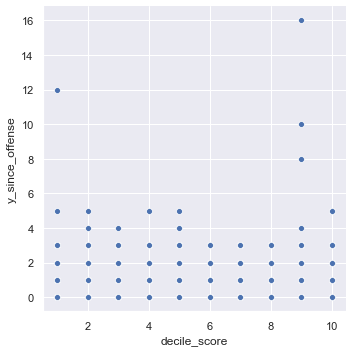

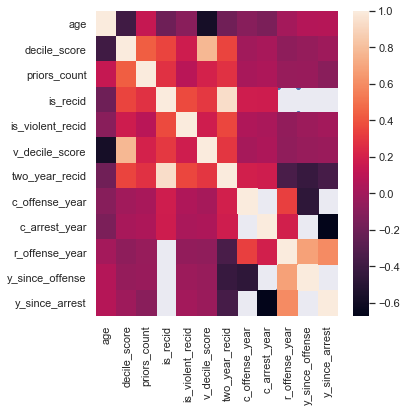

In [379]:
sinceOffense = sns.relplot(x="decile_score", y="y_since_offense", data=compas0)
sinceArrest = sns.relplot(x="decile_score", y="y_since_arrest", data=compas0)

sns.heatmap(compas0.select_dtypes([int,float]).corr())
compas0.head()


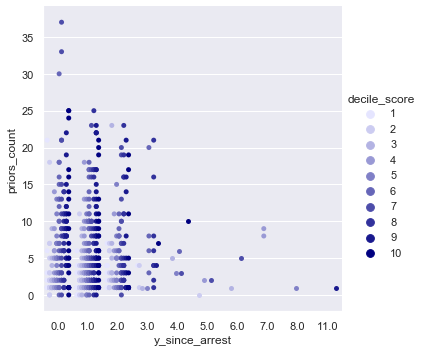

In [388]:
sns.catplot(x="y_since_arrest", y="priors_count", hue="decile_score", data=compas0, kind="strip", 
            jitter=False, color='navy', dodge=True)

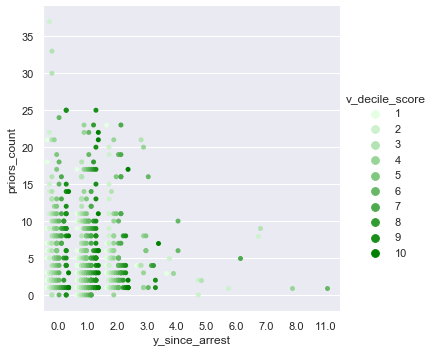

In [389]:
sns.catplot(x="y_since_arrest", y="priors_count", hue="v_decile_score", data=compas0, kind="strip", 
            jitter=False, color='green', dodge=True)